In [1]:
import torch
import torchaudio
import matplotlib.pyplot as plt

Shape of waveform:torch.Size([2, 11612160])
Sample rate:44100
<class 'int'>


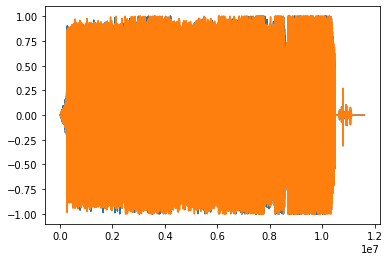

In [2]:
filename='/home/akashnagaraj/Desktop/DEEP-LEARNING/Torch/supreme-torch/data/song.mp3'
waveform,sample_rate=torchaudio.load(filename)

print('Shape of waveform:{}'.format(waveform.size()))
print('Sample rate:{}'.format(sample_rate))
print(type(sample_rate))
plt.figure()
plt.plot(waveform.t().numpy())

Shape of spectogram:torch.Size([2, 201, 58061])


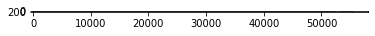

In [3]:
specgram=torchaudio.transforms.Spectrogram()(waveform)

print('Shape of spectogram:{}'.format(specgram.size()))

plt.figure()
plt.imshow(specgram.log2()[0,:,:].numpy(),cmap='gray')

Shape of transformed waveform:torch.Size([1, 1161216])


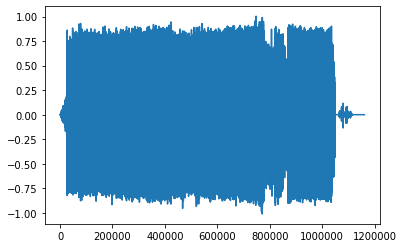

In [6]:
new_sample_rate=sample_rate/10

channel=0
transformed=torchaudio.transforms.Resample(sample_rate,new_sample_rate)(waveform[channel,:].view(1,-1))

print('Shape of transformed waveform:{}'.format(transformed.size()))

plt.figure()
plt.plot(transformed[0,:].numpy())

In [8]:
print('Min of waveform:{}\nMax of waveform:{}\nMean of waveform:{}'.format(waveform.min(),waveform.max(),waveform.mean()))

Min of waveform:-1.0
Max of waveform:1.0
Mean of waveform:-0.0004138930526096374


In [9]:
def normalize(tensor):
    tensor_minus_mean=tensor-waveform.mean()
    return tensor_minus_mean/tensor_minus_mean.abs().max()

Shape of transformed waveform: torch.Size([2, 11612160])


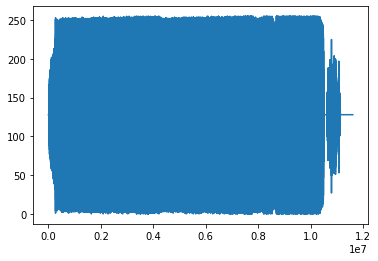

In [10]:
transformed=torchaudio.transforms.MuLawEncoding()(waveform)

print('Shape of transformed waveform: {}'.format(transformed.size()))

plt.figure()
plt.plot(transformed[0,:].numpy())

Shape recovered:torch.Size([2, 11612160])


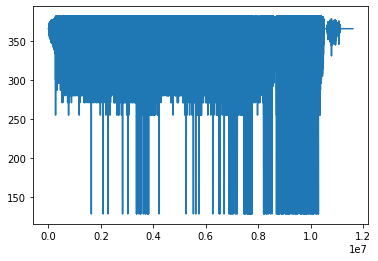

In [11]:
reconstructed=torchaudio.transforms.MuLawEncoding()(transformed)

print("Shape recovered:{}".format(reconstructed.size()))

plt.figure()
plt.plot(reconstructed[0,:].numpy())

In [26]:
print(waveform.float()-reconstructed.float())

tensor([[-366., -366., -366.,  ..., -366., -366., -366.],
        [-366., -366., -366.,  ..., -366., -366., -366.]])


In [29]:
err = ((waveform.float()-reconstructed.float()/ waveform.abs()).median())

print("Median relative difference between original and MuLaw reconstucted signals: {:.2%}".format(err))

Median relative difference between original and MuLaw reconstucted signals: -265688.26%
